# Deep Learning for NLP: An Application-based Intro

In [12]:
# Imports
# Basics
from __future__ import print_function, division
import pandas as pd 
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
# gensim
from gensim import corpora, models, similarities, matutils
from gensim.models import Word2Vec

# nltk
from nltk.corpus import gutenberg

# sklearn

# keras
np.random.seed(13)
from keras.models import Sequential
from keras.layers import Dense, Embedding, Reshape, Activation, SimpleRNN, GRU, LSTM, Convolution1D, MaxPooling1D, Merge, Dropout
from IPython.display import SVG
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer, base_filter
from keras.utils.visualize_util import model_to_dot, plot
from keras.datasets import imdb, reuters
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop


# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Intro to `Keras` with Artificial Neural Networks (ANNs)

- What is `Keras`?

- What is `Keras`?
  - A fantastic **wrapper**!

  - Around what?

  - **TensorFlow** and/or **Theano**

  - And what do those do?

  - **Deep Learning**!!

## Deep Learning Reminder
- Deep Learning is going to take over the world
<img  src="img/landscape-1431110160-terminator.jpg" style='height:200px'/>
- Allegedly!

## Deep Learning Reminder 
- Deep Learning = Fancy ANNs (Artificial Neural Networks)
- "**Deep**" $\rightarrow$ Many Hidden Layers
- Fancy $\rightarrow$ Complex Network structures that capture more information from data
<div>
<table align="center"><tr><td><img  src="img/neural_net.jpeg" style="float: left; width: 100%; margin-right: 1%; margin-bottom: 0.5em;"/></td><td><img  src="img/rnn.png" style="float: left; width: 100%; height: 300px; margin-right: 1%; margin-bottom: 0.5em;"/></td></tr><tr><td style="text-align: center">Simple 2-layer ANN</td><td style="text-align: center">Deep Recurrent Neural Network (RNN)</td></tr></table>
</div>

### Deep Learning Don't Stress
- You got this!
- The concepts are all the same:
  - Nodes feedforward to their successors and backpropagate to update weights to their predecessors
  - Weights matrices represent transitions between nodes

### Deep Learning Don't Stress
1. Take the input
2. Run it thru the network
3. Compute the Error/Cost
4. Backpropagate to update weights via gradient of cost function

We could do a whole course on this!  But today, we'll focus on applications :) 

## `Keras` Setup
- `pip install keras`
- In `.bashrc`/`.bash_profile`: `export KERAS_BACKEND=theano`
  - You can run TensorFlow instead if you want
- For visualizing networks:
  - `pip install pydot-ng`
  - `brew install graphviz`
  - `pip install pydot`

### `Keras`: Using the GPU
- Deep Learning requires tons of matrix computations
- GPUs can do this really fast in parallel (many cores!)
- Optional: Set up with your GPU (if you can!)
  - Install [CUDA](http://docs.nvidia.com/cuda/index.html#axzz4Pa5zY8Qi) 
  - In `.bashrc`/`.bash_profile`: `export THEANO_FLAGS=device=gpu,floatX=float32`
- Don't worry, you can just use AWS's big toys!

## `Keras` Models
- The core objects in `Keras` are `Models` and `Layers`
- `Models` set up the container for your network
- `Layers` fill in the architecture (connections, unit types, activation functions, etc)
- The 2 options for `Models`:
  - `Sequential`: The basic one we'll focus on
  - Function API: Specify complex uncommon models

### The Sequential Model
- Allow you to stack all sorts of layers in your network
- Canvas on which you paint your beautiful network!
- We'll focus on these only today
- Let's take a look!

In [15]:
# Create a Keras Sequential model 
model = Sequential()

# Specify the network architecture
# Here we add layers to our model, we'll come back to that in a bit
model.add(Dense(output_dim=64, input_dim=100))
model.add(Activation("relu"))
model.add(Dense(output_dim=10))
model.add(Activation("softmax"))

#### Viewing the Network
- `Keras` let's you view your network architecture!
- Here's how:

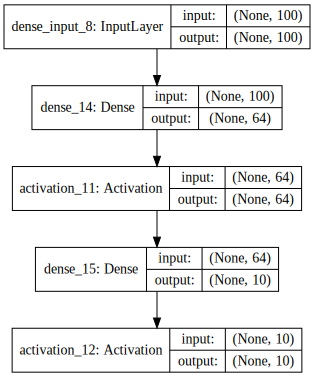

In [14]:
# View the network graphically
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

So pretty! 

#### Compiling the Network
- Sets up training parameters before training
- e.g.: Cost (Loss) function, Optimization method, Scoring metric

In [16]:
# Compile the network
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#### Training the Network
- Like `sklearn`, call `fit` (usually) on `numpy` arrays!
- ***Epoch***: 1 Full pass through the training set
  - Remember, training with Gradient Descent (or similar) we likely take many passes

In [17]:
# Make some fake data
from keras.utils.np_utils import to_categorical
X_train = np.random.random((200, 100))
y_train = np.random.randint(0, 10, 200)
y_train = to_categorical(y_train)

# Fit the model 
model.fit(X_train, y_train, nb_epoch=5, batch_size=32)

# Fit in batches 
# model.train_on_batch(X_batch, Y_batch)

Epoch 1/5
200/200 [==============================] - 0s - loss: 2.3406 - acc: 0.0950     
Epoch 2/5
200/200 [==============================] - 0s - loss: 2.3232 - acc: 0.1100     
Epoch 3/5
200/200 [==============================] - 0s - loss: 2.3123 - acc: 0.1150     
Epoch 4/5
200/200 [==============================] - 0s - loss: 2.3016 - acc: 0.1300     
Epoch 5/5
200/200 [==============================] - 0s - loss: 2.2971 - acc: 0.1250     


#### Evaluating and Making Predictions
- Like `sklearn`, we have nice predict and evaluation functions!
- Here's an example:

In [18]:
# Evaluate
X_test = np.random.random((200, 100))
y_test = np.random.randint(0, 10, 200)
y_test = to_categorical(y_test)
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('\n', loss_and_metrics)

# Make Predictions
classes = model.predict_classes(X_test, batch_size=32)
proba = model.predict_proba(X_test, batch_size=32)

 32/200 [===>..........................] - ETA: 0s
 [2.3699144649505617, 0.059999999999999998]
 32/200 [===>..........................] - ETA: 0s

#### The Functional API
- Let's you specify more complicated models
- Not our focus today, `Sequential` is plenty!

## `Keras` Layers
- Layers are where the real action's at
- This is where you "architect" your network
- Different architectures solve different problems well!
- Layers define:
  - Nodes (Network Units, can be complex themselves)
  - Connections
  - Properties on Units and Connections

### Dense Layers
- Simplest kind of layer, `Dense`
- Familiar from standard ANN
- Fully connected between inputs and outputs
- This is the usual gal!

In [19]:
# 2 ways to specify layers:
# Model Constructor or add() method
# These are the same model: 
model1 = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model2 = Sequential()
model2.add(Dense(32, input_dim=784))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Same model 
#SVG(model_to_dot(model1, show_shapes=True).create(prog='dot', format='svg'))
# SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

### Activation Layers
- Specify the **activation function** for a layer
- How the inputs are combined with weights in the layer
- Options: `softmax`, `sigmoid`, `relu`, `tanh`, more...
- Use `softmax` for multiclass outputs!  For K classes:
$P(y=j|x) = frac{e^{x^Tw_j}}{\sum\limits_{k=1}^K e^{x^Tw_k}}$

### Merge Layers
- Merge multiple `Sequential` models into a single layer
- A number of options for merging outputs: `concat`, `sum`, `ave`, etc
- Like so:

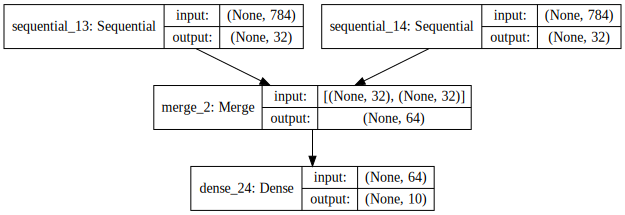

In [20]:
# Create the 2 models
left_branch = Sequential()
left_branch.add(Dense(32, input_dim=784))

right_branch = Sequential()
right_branch.add(Dense(32, input_dim=784))

# Merge
merged = Merge([left_branch, right_branch], mode='concat')

final_model = Sequential()
final_model.add(merged)
final_model.add(Dense(10, activation='softmax'))

# Take a look 
SVG(model_to_dot(final_model, show_shapes=True).create(prog='dot', format='svg'))

### Advanced Layers
- Bunch of additional layer options
- For state of the art performance on NLP, Image Proc, etc
- e.g.:
  - Convolutional Layers
  - Pooling Layers
  - Recurrent Layers
  - Embedding Layers
  - and more!
- We'll briefly touch on a few as we see them in examples
- Remember, today is about applications!

## Keras: A Simple Example ANN
- Let's try a simple example with document classification
- We'll use only Dense and Activation Layers
- Plus 1 more!
- **Dropout**:
  - Controls for **Overfitting** $\rightarrow$ **Regularization**
  - Randomly zeros out certain inputs in the layer
- We'll use the famous Reuters Document Classification set:

In [22]:
# Set the max number of words to keep, 2000 most frequent 
max_features = 2000
(X_train, y_train), (X_test, y_test) = reuters.load_data(nb_words=max_features)
maxlen = 10
# Data is stored in sentences, pad any that are shorter than 10 words with zeros
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, input_dim=10, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, init='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(46, init='uniform'))
model.add(Activation('softmax'))

# Momentum: gradient descent moves faster if gradient keeps pointing in the same direction
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, y_train,
          nb_epoch=20,
          batch_size=16)
score = model.evaluate(X_test, y_test, batch_size=16)

Epoch 1/20
8982/8982 [==============================] - 2s - loss: 4.5503 - acc: 0.2120     
Epoch 2/20
8982/8982 [==============================] - 2s - loss: 4.7617 - acc: 0.2168     
Epoch 3/20
8982/8982 [==============================] - 2s - loss: 4.8244 - acc: 0.2081     
Epoch 4/20
8982/8982 [==============================] - 2s - loss: 4.8648 - acc: 0.2104     
Epoch 5/20
8982/8982 [==============================] - 1s - loss: 4.7534 - acc: 0.2144     
Epoch 6/20
8982/8982 [==============================] - 2s - loss: 4.7971 - acc: 0.2135     
Epoch 7/20
8982/8982 [==============================] - 2s - loss: 4.7839 - acc: 0.2140     
Epoch 8/20
8982/8982 [==============================] - 2s - loss: 4.7223 - acc: 0.2150     
Epoch 9/20
8982/8982 [==============================] - 2s - loss: 4.8765 - acc: 0.2116     
Epoch 10/20
8982/8982 [==============================] - 2s - loss: 4.7866 - acc: 0.2093     
Epoch 11/20
8982/8982 [==============================] - 2s - loss: 4

Mmm...not a great job!  Although with 46 classes it's okay, but I think we can do better.  We'll return!

## A (slightly) more complex example: Skipgrams!
- Back to your old favorite
- Let's see if we can implement Skipgrams in `Keras`:

### Loading in Data

In [23]:
# Load in Corpus using Keras utility
# We'll use Alice in Wonderland :)
path = get_file('carrol-alice.txt', origin="http://www.gutenberg.org/files/11/11-0.txt")
corpus = open(path).readlines()[0:200]

180224/173595 [===============================] - 1s    


### Keras: Preprocessing Data
- `Keras` has some nice text preprocessing features too!
- We need to convert into a special format, like below:

In [24]:
# For simplicity, one "sentence" per line 
corpus = [sentence for sentence in corpus if sentence.count(" ") >= 2]

# Tokenize using Keras
tokenizer = Tokenizer(filters=base_filter()+"'")
tokenizer.fit_on_texts(corpus)

# Convert tokenized sentences to sequence format
sequences = tokenizer.texts_to_sequences(corpus)
nb_samples = sum(len(s) for s in corpus)

# Vocab size
V = len(tokenizer.word_index) + 1
# Dimension to reduce to
dim = 100
window_size = 2
sequences

[[654, 304, 80, 87, 10, 225, 50, 188, 210],
 [27, 81, 89, 21, 1, 58, 8, 410, 321, 36, 37, 270, 6, 83],
 [212, 37, 491, 253, 19, 336, 419, 4, 324, 4, 203, 101],
 [388, 58, 4, 136, 1, 486, 8, 1, 180, 128, 493, 485],
 [39, 27, 81, 23, 437, 36, 580, 128, 353],
 [460, 80, 87, 10, 191],
 [533, 188, 210],
 [310, 151, 641, 351, 655, 81, 422, 9],
 [473, 151, 564, 574],
 [492, 255, 467, 308, 472],
 [558, 474, 402, 624, 386],
 [616, 8, 27, 180, 128, 81, 80, 87, 10, 225, 9],
 [80, 87, 10, 191],
 [1, 390, 245, 476, 483, 478],
 [600, 16, 11, 1, 31, 520],
 [14, 5, 396, 3, 55, 17, 265, 8, 257, 50, 15, 142, 30, 44],
 [560, 6, 8, 656, 66, 3, 46, 241, 23, 471, 2, 20, 623, 70, 44],
 [100, 15, 142, 5, 470, 18, 4, 20, 37, 202, 23, 360, 651],
 [4, 121, 52, 89, 1, 58, 8, 7, 100, 12, 48, 14, 405, 202, 101],
 [32, 2, 5, 208, 10, 15, 605, 182, 25, 94, 25, 2, 77, 21, 44],
 [333, 364, 236, 15, 403, 17, 216, 6, 389, 237, 1, 455],
 [8, 322, 7, 399, 244, 41, 34, 254, 1, 259, 8, 227, 24, 59],
 [490, 1, 344, 72, 57, 7,

### Skipgrams: Generating Input and Output Labels
- Now we need to generate our `X_train` and `y_train`
- So we can train!

In [25]:
# Function to generate the inputs and outputs for all windows
def generate_data(sequences, window_size, V):
    maxlen = window_size*2
    # For each line (sentence)
    for words in sequences:
        L = len(words)
        # Choose the target word
        for index, word in enumerate(words):
            # Create the window
            s = index-window_size
            e = index+window_size+1
                    
            in_words = []
            labels = []
            # Create the input/outputs for skipgrams
            for i in range(s, e):
                if i != index and 0 <= i < L:
                    in_words.append([word] )
                    labels.append(words[i])

            x = np.array(in_words,dtype=np.int32)
            y = np_utils.to_categorical(labels, V)
            yield (x, y)

### Skipgrams: Creating the Model
- Lastly, we create the (shallow) network!

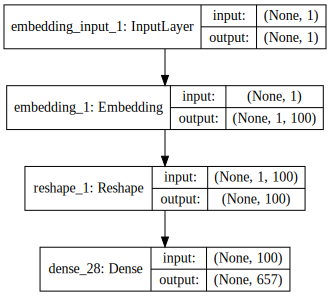

In [26]:
# Create the Keras model and view it 
skipgram = Sequential()
skipgram.add(Embedding(input_dim=V, output_dim=dim, init='glorot_uniform', input_length=1))
skipgram.add(Reshape((dim, )))
skipgram.add(Dense(input_dim=dim, output_dim=V, activation='softmax'))
SVG(model_to_dot(skipgram, show_shapes=True).create(prog='dot', format='svg'))

### Skipgrams: Compiling and Training
- Time to compile and train
- We use crossentropy, common loss for classification

In [27]:
# Compile the Keras Model
skipgram.compile(loss='categorical_crossentropy', optimizer="adadelta")

# Fit the Skipgrams
for iteration in range(10):
    loss = 0.
    for x, y in generate_data(sequences, window_size, V):
        loss += skipgram.train_on_batch(x, y)

    print(iteration, loss)

0 nan
1 nan
2 nan
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan


### Skipgrams: Saving the Vectors
- Let's save the vectors to a file
- So we can load them into word2vec and test them out!

In [28]:
# Write the resulting vectors to a text file
f = open('vectors.txt' ,'w')
f.write(" ".join([str(V-1),str(dim)]))
f.write("\n")
vectors = skipgram.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write(word)
    f.write(" ")
    f.write(" ".join(map(str, list(vectors[i,:]))))
    f.write("\n")
f.close()

### Skipgrams: Examining the Vectors
- Let's load the vectors in to query them with `gensim`!

In [29]:
# Load the vectors into word2vec and see how we did!
w2v = Word2Vec.load_word2vec_format('./vectors.txt', binary=False)
w2v.most_similar(positive=['white', 'rabbit'])

[(u'this\r', 0.3330727219581604),
 (u'read', 0.27034682035446167),
 (u'ought', 0.2681456506252289),
 (u'please', 0.2609839141368866),
 (u'there', 0.25028860569000244),
 (u'taste\r', 0.2501465976238251),
 (u'half', 0.24524283409118652),
 (u'turkey', 0.2368951439857483),
 (u'could\r', 0.2360805720090866),
 (u'shall\r', 0.23158985376358032)]

# Recurrent Neural Networks (RNNs)
- So far, stuck to simple ANNs (fully connected)
- RNNs change the game
- How do they do it?

# Recurrent Neural Networks (RNNs)
- Connections between units form a **directed cycle**
- Allows network to retain internal state from past units $\rightarrow$ **memory**
- Allows dynamic temporal behavior
- Can use memory to process arbitrary input sequences!
- Terrific success in various NLP tasks

# Recurrent Neural Networks (RNNs)
- How do they do it?
- Hidden Units at a time step t are dependent on:
  - The previous hidden unit
  - The input at time step t
<img  src="img/rnn3.jpg" style="width:50%"/>

# Recurrent Neural Networks (RNNs)
- Drawback of ANNs: Fixed # of inputs and outputs
- RNNs can map arbitrary length sequences of each!
<img  src="img/rnn2.jpeg" style="width:50%"/>
- Don't stress!  Just a different architecture with some nice features!  Same solving concepts apply!

# Recurrent Neural Networks (RNNs)
- One more view!
<img  src="img/rnn4.png" style="width:50%"/>

## RNN Example: Text Classification
- Let's try an RNN for the same Reuters classification task:

In [30]:
# Same data loading as before
max_features = 2000
(X_train, y_train), (X_test, y_test) = reuters.load_data(
    nb_words=max_features)
maxlen = 10
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
nb_epoch = 20

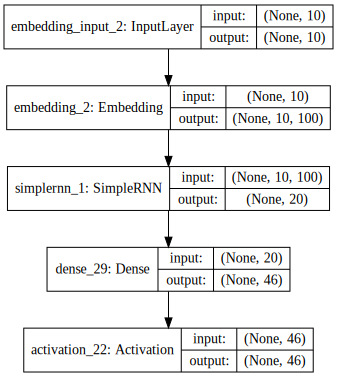

In [31]:
# Create the model
model = Sequential()
# The Embedding layer allows us to map words into dense vectors as inputs, common first layer
model.add(Embedding(input_dim=max_features, output_dim=100, init='glorot_uniform', input_length=maxlen))
# This is the most basic kind of RNN!  We're using 20 units, 
#which somewhat reflects our "memory" of past events in a sequence
# For the purposes of keras, it's just another type of "unit" you can try!
model.add(SimpleRNN(20, return_sequences=False))
model.add(Dense(46))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [32]:
# Train the model
model.fit(X_train, y_train, batch_size=256, nb_epoch=nb_epoch, 
          validation_data=(X_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 1s - loss: 3.4709 - acc: 0.2403 - val_loss: 2.8493 - val_acc: 0.3624
Epoch 2/20
8982/8982 [==============================] - 0s - loss: 2.5354 - acc: 0.3712 - val_loss: 2.3653 - val_acc: 0.4443
Epoch 3/20
8982/8982 [==============================] - 1s - loss: 2.2912 - acc: 0.4319 - val_loss: 2.2724 - val_acc: 0.4533
Epoch 4/20
8982/8982 [==============================] - 0s - loss: 2.1866 - acc: 0.4497 - val_loss: 2.2144 - val_acc: 0.4176
Epoch 5/20
8982/8982 [==============================] - 1s - loss: 2.1223 - acc: 0.4614 - val_loss: 2.1498 - val_acc: 0.4559
Epoch 6/20
8982/8982 [==============================] - 0s - loss: 2.0703 - acc: 0.4715 - val_loss: 2.1286 - val_acc: 0.4590
Epoch 7/20
8982/8982 [==============================] - 1s - loss: 2.0302 - acc: 0.4780 - val_loss: 2.1132 - val_acc: 0.4635
Epoch 8/20
8982/8982 [==============================] - 1s - loss: 1.9952 - a

**WHOA!** Over 100% improvement on ANN!

# Long Short-Term Memory (LSTM) Networks
- LSTM are a special kind of RNN (invented in 1997)
- State of the art for many sequence to sequence mapping and text generation tasks
- Adds an explicit "memory" unit
- Augment RNNs with a few additional **Gate Units**
  - Gate Units control how long/if events will stay in memory
  - **Input Gate**: If its value is such, it causes items to be stored in memory
  - **Forget Gate**: If its value is such, it causes items to be removed from memory
  - **Output Gate**: If its value is such, it causes the hidden unit to feed forward (output) in the network
- Here's what it looks like:
<img  src="img/LSTM.png" style="height:300px"/>
- We won't go much further in theory, just know this is state of the art (ish)
  - And you can do it!  Watch!

## LSTM Example: Sentiment Analysis
- Here is some code to train sentiment analysis on IMDB reviews:

In [ ]:
# Set parameters
max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

# Load data (Keras utility)
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

# Pad Short sentences
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# Build our model!
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
# Here's the LSTM magic!
model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2))  # try using a GRU instead, for fun
model.add(Dense(1))
# Sigmoid for binary classification
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=15,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
65560576/65552540 [==============================] - 745s   
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
X_train shape: (25000, 80)
X_test shape: (25000, 80)
Build model...
Train...


/usr/local/lib/python2.7/site-packages/tensorflow/python/ops/gradients.py:90: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 720s - loss: 0.5275 - acc: 0.7343 - val_loss: 0.3998 - val_acc: 0.8257
Epoch 2/15
23168/25000 [==========================>...] - ETA: 43s - loss: 0.3814 - acc: 0.8358

# Convolutional Neural Networks (CNN)
- You've seen CNNs a little
- They'll be discussed more next week with images
- Had great success with images
- But, they do some nice things with NLP too!...

## CNN Example: Sentiment Analysis Revisited
- Here's the same Sentiment task with a CNN + LSTM:

In [ ]:
# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
filter_length = 5
nb_filter = 64
pool_length = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
nb_epoch = 2

'''
Note:
batch_size is highly sensitive.
Only 2 epochs are needed as the dataset is very small.
'''

# Load data
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

# Pad sentences
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
# Convolution!
model.add(Convolution1D(nb_filter=nb_filter,
                        filter_length=filter_length,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))
model.add(MaxPooling1D(pool_length=pool_length))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

# Bidirectional Recurrent Neural Networks (RNN)
- Bidirectionall RNNs simply connect in both directions
- Thus, output can be dependent on both future and past inputs
- Good for context around a word, for instance
  - e.g. Named Entity Recognition, is this a "person" token?
<img  src="brnn.jpg" style="width:70%"/>

## How do you feel about all this sentiment?
- One more time on the sentiment, now with a BRNN!

In [ ]:
max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print("Pad sequences (samples x time)")
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
# Bidirectional LSTM!!!
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          nb_epoch=4,
          validation_data=[X_test, y_test])

# Onward to AWS!
- Now that you saw how long those CPUs can take...
- Let's go to GPUs!
- That means AWS...

## Setting up a Deep Learning AWS GPU Instance
- We're going to use the **fantastic** EC2 Image that a former student of mine set up
- It has all sorts of goodies preconfigured for your Deep Learning joy
- You can find his repo [here](https://github.com/Miej/GoDeeper)
- Now follow along with me as we venture Beyond the Wall!
- **Caution**: This will cost $.  If you don't have your AWS credits, be wary.

### Launching the Instance
1. Proceed to the AWS EC2 Console
2. Click "Launch Instance"
3. Click Community AMIs
4. Search for "3e22685e" (make sure you're in the US West (N California) zone or it won't show up)
5. Click Select
6. Select the g2.2xlarge instance and click "Next: Configure Instance Details"
7. Click thru the defaults until Step 5: Tag Instance, give it a name "GPU"
8. Click thru to Step 6: Configure Security Group.  In the rules, select All TCP and Address "My IP", "Review and Launch"!
9. Choose the keypair you should already have and let 'er rip!

### Configuration
1. Log onto your server via:
  - `ssh -i <your_keypair.pem> icarus@<your_public_ip>`
  - Password: `changetheworld`
2. Log out
3. In EC2 Console, reboot your instance (for init scripts to run)
4. Log back in again (#1 above) and let's go!

### Start a Jupyter Notebook (on your server)
- You know how to do this!:
  - `jupyter notebook`
- If you want it to be open to the internet, you'll need to follow these instructions:
  - [Running Jupyter Notebook Server in AWS](http://jupyter-notebook.readthedocs.io/en/latest/public_server.html)
- In your local browser, browse to:
  - `https://<your_public_ip>:8888`
  - Note, you'll probably have to `pip install gensim` on the server
- And let's begin!

## AWS LSTM + CNN Example: Sentiment 1 more time!
- Let's marvel at how blazing fast the same example runs on your GPU instance!

In [ ]:
# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
filter_length = 5
nb_filter = 64
pool_length = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
nb_epoch = 2

'''
Note:
batch_size is highly sensitive.
Only 2 epochs are needed as the dataset is very small.
'''

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Convolution1D(nb_filter=nb_filter,
                        filter_length=filter_length,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))
model.add(MaxPooling1D(pool_length=pool_length))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

## LSTM Example: Text Generation
- Finally, a different example!
- We're going to do **Text Generation** with **LSTM**
- We'll watch our model start spitting out words of Nils's favorite philosopher in real time!
  - ps, it's Friedrich Nietzsche
- As we go through epoch's, the ability to generate Nietzcheian sentences will get better and better!
- Let's go!

In [ ]:
path = get_file('nietzsche.txt', origin="https://s3.amazonaws.com/text-datasets/nietzsche.txt")
text = open(path).read().lower()
print('corpus length:', len(text))

chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

print('Vectorization...')
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


# build the model: a single LSTM
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)


def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# train the model, output generated text after each iteration
for iteration in range(1, 60):
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model.fit(X, y, batch_size=128, nb_epoch=1)

    start_index = random.randint(0, len(text) - maxlen - 1)

    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.

            preds = model.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

## Additional Excitement: `seq2seq`

### `seq2seq` Example: Question Answering

### `seq2seq` Use Case: Machine Translation

# Other Successful Deep Learning Applications
- Machine Translation
- Named Entity Recognition
- Image Processing (next week!)
- Image + Video Captioning
- Chatbots
- Text Generation
- Question Answering